In [11]:
import pandas 
import numpy as np 
import math
import matplotlib.pyplot as plt

df =  pandas.read_csv("data/faithful.csv")
print(df)



     eruptions  waiting
0        3.600       79
1        1.800       54
2        3.333       74
3        2.283       62
4        4.533       85
..         ...      ...
267      4.117       81
268      2.150       46
269      4.417       90
270      1.817       46
271      4.467       74

[272 rows x 2 columns]


(1a)

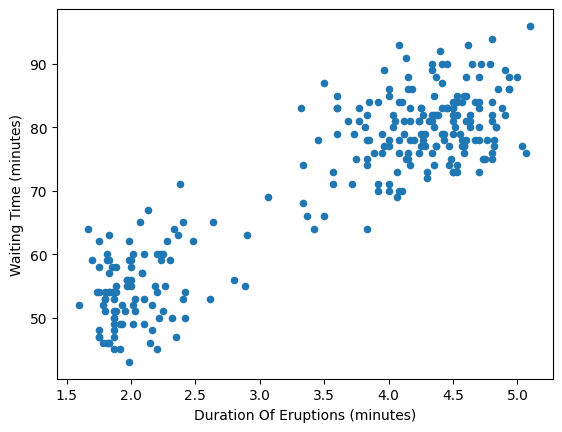

In [12]:

def plot_scatter():
    df_scatter = df.plot.scatter(x ="eruptions", y= "waiting")
    df_scatter.set_xlabel("Duration Of Eruptions (minutes)")
    df_scatter.set_ylabel("Waiting Time (minutes)")

plot_scatter()

Yes, I definetly do think there is a relationship between waiting time and eruption time, as the duration of eruptioins increased the waiting time between also increased

(1b)

In [13]:
df_means= df.mean(axis = 0)
eruptions_mean = df_means.iloc[0] 
waiting_mean = df_means.iloc[1]

print("mean of eruptions column:",eruptions_mean)
print("mean of waiting column:",waiting_mean)

centered_df= df.copy() # centered_df
centered_df["X"] = centered_df["eruptions"] - eruptions_mean
centered_df["Y"] = centered_df["waiting"] - waiting_mean

centered_X = np.asarray(centered_df["X"])
centered_Y = np.asarray(centered_df["Y"])

mean of eruptions column: 3.4877830882352936
mean of waiting column: 70.8970588235294


(1c)

In [14]:
# functino take in 2 numpy arrays

def innerproduct(x,y):
    return np.sum(x*y)

def magnitude(x):
    return math.sqrt(np.sum(x ** 2))

#2 centered arrays
def correlation(x,y):
    return innerproduct(x,y)/(magnitude(x)*magnitude(y))

eruptions_arr =  np.asarray(centered_df["eruptions"])
waiting_arr = np.asarray(centered_df["waiting"])

print("Correlation:", correlation(centered_X,centered_Y))

Correlation: 0.9008111683218128


(1d)

Slope 10.729641395133523
Y-intercept 33.474397022753365


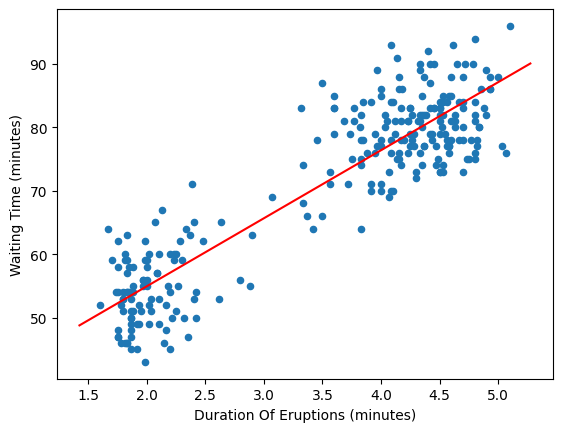

In [15]:
def slope(x_center,y_center):
    return(innerproduct(x_center,y_center)/(magnitude(x_center) ** 2))

def yint(x_mean,y_mean,x_center,y_center):
    return y_mean - slope(x_center,y_center)*x_mean

df_slope = slope(centered_df['X'],centered_df["Y"])
df_yint = yint(eruptions_mean,waiting_mean,centered_X,centered_Y)
print("Slope",df_slope)
print("Y-intercept",df_yint)

##found this function on stackoverflow link is here: https://stackoverflow.com/questions/7941226/how-to-add-line-based-on-slope-and-intercept ##

def plotreg(slope, intercept):
    
    plot_scatter()
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, color = 'red')

plotreg(df_slope,df_yint)

The slope of the regression line and the correlation are both positive and the value of the slope is around 10.7

(1e)

In [16]:
def prediction(x_value):
    return df_slope*x_value + df_yint

print(prediction(2.2),"minutes before next eruption")

57.07960809204712 minutes before next eruption


(1f)

In [17]:
#total variance in Y
def SST():
    return np.sum((waiting_arr - waiting_mean)**2)
#explained variance in Y
def SSR():
    return np.sum((prediction(eruptions_arr) - waiting_mean)**2)

#unexplained variance in Y
def SSE():
    return np.sum((prediction(eruptions_arr)-waiting_arr)**2)

def Rsquared():
    return 1-(SSE()/SST())
    
print("R-Squared:",Rsquared())

R-Squared: 0.8114607609733097


(2a)

[[314 489]
 [333 473]
 [350 455]
 [366 436]
 [383 417]
 [402 402]
 [415 377]
 [432 355]
 [452 333]
 [460 307]
 [474 283]
 [475 257]
 [451 257]
 [431 273]
 [416 294]
 [403 317]
 [384 335]
 [361 336]
 [341 294]
 [333 244]
 [330 192]
 [331 140]
 [328  88]
 [306  47]
 [286  67]
 [287  99]
 [287 132]
 [283 162]
 [283 196]
 [276 223]
 [271 191]
 [274 155]
 [275 120]
 [277  84]
 [278  48]
 [259  24]
 [238  45]
 [237  80]
 [234 115]
 [226 147]
 [227 183]
 [223 216]
 [212 191]
 [208 162]
 [208 132]
 [211 103]
 [211  72]
 [196  51]
 [173  74]
 [171 110]
 [169 147]
 [165 184]
 [171 219]
 [172 255]
 [163 235]
 [159 210]
 [153 187]
 [151 162]
 [148 137]
 [133 121]
 [116 149]
 [118 186]
 [122 223]
 [130 259]
 [130 296]
 [134 333]
 [136 370]
 [141 406]
 [150 441]
 [154 477]
 [140 510]]


Text(0.5, 1.0, 'Plot of A1 and A2')

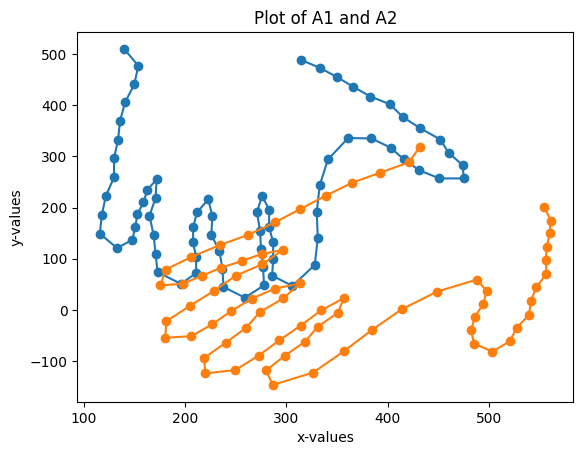

In [21]:
A1 = np.asarray(pandas.read_csv("data/hand1.dat"))
A2 = np.asarray(pandas.read_csv("data/hand2.dat"))

print(A1)
plt.plot(A1[:,0],A1[:,1],  '-o')
plt.plot( A2[:,0], A2[:,1], '-o')
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.title("Plot of A1 and A2")

(2b)

In [19]:

A1TA2 = A1.transpose()  @ A2


U,S, Vt = np.linalg.svd((A1TA2), full_matrices=True)

R =  U @ Vt # matrix multiplication

print(R)
#theta = arctan2(r21,r11)
angle = np.arctan2(R[1, 0], R[0, 0]) *(180/math.pi)

print("angle:", angle,"degrees")


    


[[ 0.80705314 -0.59047881]
 [ 0.59047881  0.80705314]]
angle: 36.190993147878494 degrees


(2c)

Text(0.5, 1.0, 'Plot of Rotated A1 and A2')

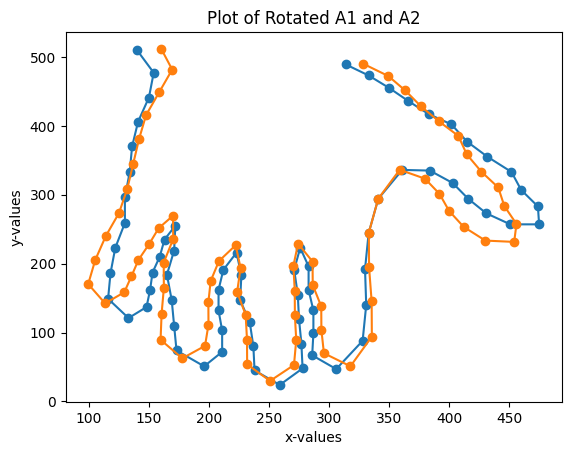

In [20]:
A2R =  R @ A2.transpose() 
A2RT = A2R.transpose()

plt.plot(A1[:,0],A1[:,1],  '-o')
plt.plot(A2RT[:,0],A2RT[:,1], '-o')
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.title("Plot of Rotated A1 and A2")

(3a)

A quadratic regression model would fit the data better because the plotted graph resembles that of a quadratic functino more than that of a linear funcitno indicaing that the values likely have more of a quadratic relationship rather than a linear one meaning that they could better be modeled using q quadratic regression model.

(3b)

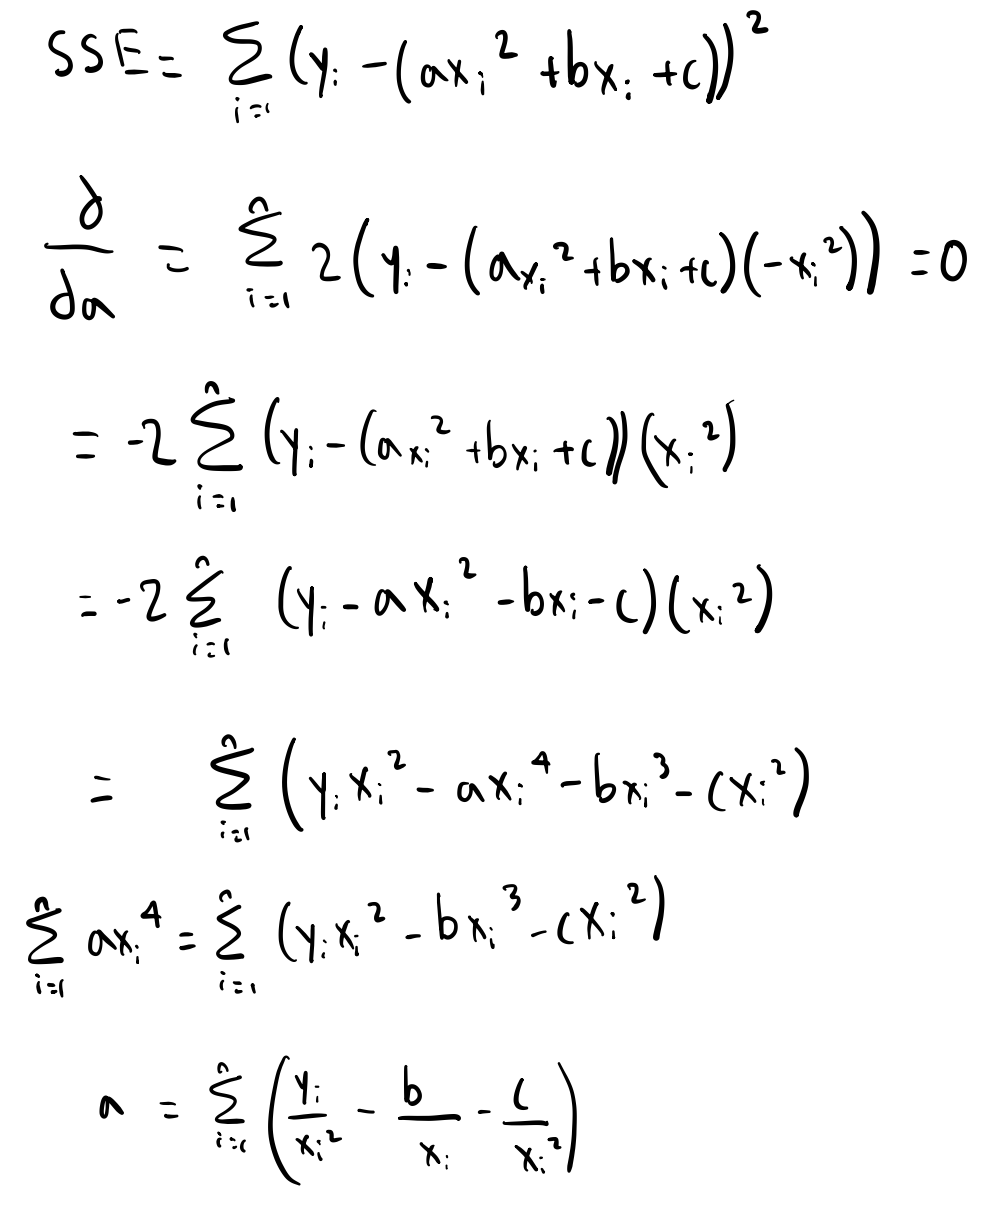

(4a)

Condenses Nearest Neigbors (CNN) - Since KNN is considered a lazy algorithm and doesn't really require "training data" give a data set with the associated classification, we can run KNN and remove and add the values which were classified where there was a differnet lable then the one given to a new dataset and use this data set for classification instead. This allows for any redudancies or repeat data when calculating distance scores and greatly reduces the time spent on the algorithm.

sketch:
-create new empty dataset for,V, for the dataset to hold the points 
-run the KNN function on the datset ,X, and if the point is classified wrong add it to the the data set V
-after this process is done until no more vlaues from X can be added to V, V is used as the new "training data set for KNN"